In [1]:
# Downloading dataset from dropbox

!wget https://www.dropbox.com/s/hm8o3b4n6v2x6rh/QueryResults.csv?dl=0
!wget https://www.dropbox.com/s/6wdv4wff68kqg4r/QueryResults%281%29.csv?dl=0
!wget https://www.dropbox.com/s/o178o5948veihdy/QueryResults%283%29.csv?dl=0
!wget https://www.dropbox.com/s/tmsqzix4t43b8xt/QueryResults%284%29.csv?dl=0
!wget https://www.dropbox.com/s/3g2p6ayrznm62vi/QueryResults%285%29.csv?dl=0
!wget https://www.dropbox.com/s/zwqnns5b8ofbwwy/QueryResults%286%29.csv?dl=0

--2019-09-19 13:51:27--  https://www.dropbox.com/s/hm8o3b4n6v2x6rh/QueryResults.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.1, 2620:100:6018:1::a27d:301
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/hm8o3b4n6v2x6rh/QueryResults.csv [following]
--2019-09-19 13:51:32--  https://www.dropbox.com/s/raw/hm8o3b4n6v2x6rh/QueryResults.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uccadfe21aeab8933d880535fd69.dl.dropboxusercontent.com/cd/0/inline/Ao3SvNcGP1bLbIGQ3iHM5rE9h1LBBbSAj_XFtQF6b89Ha8dIQCsrotCVcM5t2T-DTutmueeLJvCs17i3no-fuU0pdbhV4amqc5UWT3Yw-7Y3tg/file# [following]
--2019-09-19 13:51:32--  https://uccadfe21aeab8933d880535fd69.dl.dropboxusercontent.com/cd/0/inline/Ao3SvNcGP1bLbIGQ3iHM5rE9h1LBBbSAj_XFtQF6b89Ha8dIQCsrotCVcM5t2T-DTutmueeLJvCs17i3no-fuU0pdbhV4amqc5UWT3Yw-7Y3tg/file
Re

In [2]:
%matplotlib inline

import seaborn as sns
import pandas as pd
import numpy as np
import re, nltk, spacy, gensim
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from matplotlib.collections import LineCollection
from nltk.tokenize import ToktokTokenizer
from nltk.stem import wordnet
from nltk.corpus import stopwords
from string import punctuation

# We load our data and visualize the first 50 lines.

nltk.download("stopwords")
nltk.download("wordnet")
sns.set()

df_1 = pd.read_csv('QueryResults.csv?dl=0')
df_2 = pd.read_csv('QueryResults(1).csv?dl=0')
df_3 = pd.read_csv('QueryResults(3).csv?dl=0')
df_4 = pd.read_csv('QueryResults(4).csv?dl=0')
df_5 = pd.read_csv('QueryResults(5).csv?dl=0')
df_6 = pd.read_csv('QueryResults(6).csv?dl=0')
df = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6])
df.head(50)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,DeletionDate,Score,ViewCount,Body,OwnerUserId,OwnerDisplayName,LastEditorUserId,LastEditorDisplayName,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate
0,4,1,7.0,NaN,2008-07-31 21:42:52,NaN,608,40090.0,<p>I want to use a track-bar to change a form'...,8.0,NaN,6786713.0,Rich B,2018-07-02 17:55:27,2019-01-17 13:39:48,Convert Decimal to Double?,<c#><floating-point><type-conversion><double><...,13.0,2,46.0,NaN,2012-10-31 16:42:47
1,6,1,31.0,NaN,2008-07-31 22:08:08,NaN,275,17611.0,<p>I have an absolutely positioned <code>div</...,9.0,NaN,63550.0,Rich B,2016-03-19 06:05:48,2018-12-15 03:57:18,Percentage width child element in absolutely p...,<html><css><css3><internet-explorer-7>,6.0,0,10.0,NaN,NaN
2,7,2,NaN,4.0,2008-07-31 22:17:57,NaN,420,NaN,<p>An explicit cast to double like this isn't ...,9.0,NaN,4020527.0,NaN,2017-12-16 05:06:57,2017-12-16 05:06:57,NaN,NaN,NaN,0,NaN,NaN,NaN
3,9,1,1404.0,NaN,2008-07-31 23:40:59,NaN,1743,530042.0,<p>Given a <code>DateTime</code> representing ...,1.0,NaN,3956566.0,Rich B,2018-04-21 17:48:14,2019-04-08 22:58:20,How do I calculate someone's age in C#?,<c#><.net><datetime>,63.0,7,422.0,NaN,2011-08-16 19:40:43
4,11,1,1248.0,NaN,2008-07-31 23:55:37,NaN,1419,144832.0,<p>Given a specific <code>DateTime</code> valu...,1.0,NaN,6479704.0,user2370523,2017-06-04 15:51:19,2019-01-03 08:03:07,Calculate relative time in C#,<c#><datetime><time><datediff><relative-time-s...,36.0,3,536.0,NaN,2009-09-04 13:15:59
5,12,2,NaN,11.0,2008-07-31 23:56:41,NaN,324,NaN,"<p>Here's how I do it</p>\n\n<pre class=""lang-...",1.0,NaN,1271898.0,GateKiller,2018-01-12 16:10:22,2018-01-12 16:10:22,NaN,NaN,NaN,11,NaN,NaN,2009-09-04 13:15:59
6,13,1,NaN,NaN,2008-08-01 00:42:38,NaN,570,168356.0,<p>Is there a standard way for a web server to...,9.0,NaN,9752662.0,Rich B,2018-12-24 22:47:42,2019-02-25 18:10:55,Determine a user's timezone,<html><browser><timezone><user-agent><timezone...,24.0,10,144.0,NaN,NaN
7,14,1,NaN,NaN,2008-08-01 00:59:11,NaN,389,117797.0,"<p>What is the difference between <a href=""htt...",11.0,Anonymous User,6495084.0,Rich B,2017-02-25 17:42:17,2018-09-19 03:49:19,Difference between Math.Floor() and Math.Trunc...,<.net><math>,10.0,4,55.0,NaN,NaN
8,16,1,12446.0,NaN,2008-08-01 04:59:33,NaN,121,80977.0,<p>How do you expose a LINQ query as an ASMX w...,2.0,NaN,567854.0,Chris Fournier,2019-01-20 13:50:51,2019-01-20 13:50:51,Filling a DataSet or DataTable from a LINQ que...,<c#><linq><web-services><.net-3.5>,6.0,0,14.0,NaN,NaN
9,17,1,26.0,NaN,2008-08-01 05:09:55,NaN,171,70175.0,"<p>How do I store binary data in <a href=""http...",2.0,NaN,546051.0,NaN,2011-10-21 21:29:17,2018-01-20 09:06:34,Binary Data in MySQL,<mysql><database><binary-data><data-storage>,9.0,3,19.0,2018-11-29 15:36:04,NaN


(284147, 22)
Index(['Id', 'PostTypeId', 'AcceptedAnswerId', 'ParentId', 'CreationDate',
       'DeletionDate', 'Score', 'ViewCount', 'Body', 'OwnerUserId',
       'OwnerDisplayName', 'LastEditorUserId', 'LastEditorDisplayName',
       'LastEditDate', 'LastActivityDate', 'Title', 'Tags', 'AnswerCount',
       'CommentCount', 'FavoriteCount', 'ClosedDate', 'CommunityOwnedDate'],
      dtype='object')


Text(0.5, 1.0, 'Proportion of Nans in each column')

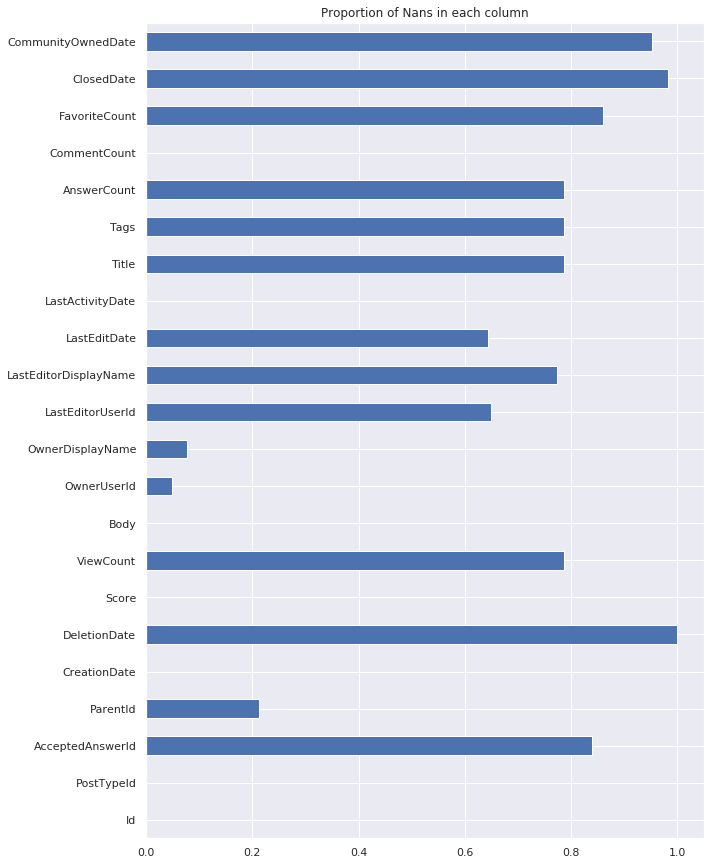

In [3]:
# We visualize, using a barplot, Nans proportion in each column of our dataset

print(df.shape)
print(df.columns)
plt.figure(figsize=(10, 15))
df.isnull().mean(axis=0).plot.barh()
plt.title("Proportion of Nans in each column")

# Feature engineering: Filtering posts

In [4]:
print('Dupplicate entries: {}'.format(df.duplicated().sum()))
df.drop_duplicates(inplace = True)

Dupplicate entries: 0


In [0]:
# Creation of a new variable named quality, which is the sum of post's score and
# the number of comments on the post

df['Quality'] = df['Score'] + df['CommentCount']

In [0]:
# Dataframe with only the posts that contain tags

df_tags = df[df['Tags'].isna()==False].reset_index(level=0, drop=True)

In [7]:
print(df_tags.shape)
df_tags.head()

(60501, 23)


,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,DeletionDate,Score,ViewCount,Body,OwnerUserId,OwnerDisplayName,LastEditorUserId,LastEditorDisplayName,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate,Quality
0,4,1,7.0,NaN,2008-07-31 21:42:52,NaN,608,40090.0,<p>I want to use a track-bar to change a form'...,8.0,NaN,6786713.0,Rich B,2018-07-02 17:55:27,2019-01-17 13:39:48,Convert Decimal to Double?,<c#><floating-point><type-conversion><double><...,13.0,2,46.0,NaN,2012-10-31 16:42:47,610
1,6,1,31.0,NaN,2008-07-31 22:08:08,NaN,275,17611.0,<p>I have an absolutely positioned <code>div</...,9.0,NaN,63550.0,Rich B,2016-03-19 06:05:48,2018-12-15 03:57:18,Percentage width child element in absolutely p...,<html><css><css3><internet-explorer-7>,6.0,0,10.0,NaN,NaN,275
2,9,1,1404.0,NaN,2008-07-31 23:40:59,NaN,1743,530042.0,<p>Given a <code>DateTime</code> representing ...,1.0,NaN,3956566.0,Rich B,2018-04-21 17:48:14,2019-04-08 22:58:20,How do I calculate someone's age in C#?,<c#><.net><datetime>,63.0,7,422.0,NaN,2011-08-16 19:40:43,1750
3,11,1,1248.0,NaN,2008-07-31 23:55:37,NaN,1419,144832.0,<p>Given a specific <code>DateTime</code> valu...,1.0,NaN,6479704.0,user2370523,2017-06-04 15:51:19,2019-01-03 08:03:07,Calculate relative time in C#,<c#><datetime><time><datediff><relative-time-s...,36.0,3,536.0,NaN,2009-09-04 13:15:59,1422
4,13,1,NaN,NaN,2008-08-01 00:42:38,NaN,570,168356.0,<p>Is there a standard way for a web server to...,9.0,NaN,9752662.0,Rich B,2018-12-24 22:47:42,2019-02-25 18:10:55,Determine a user's timezone,<html><browser><timezone><user-agent><timezone...,24.0,10,144.0,NaN,NaN,580


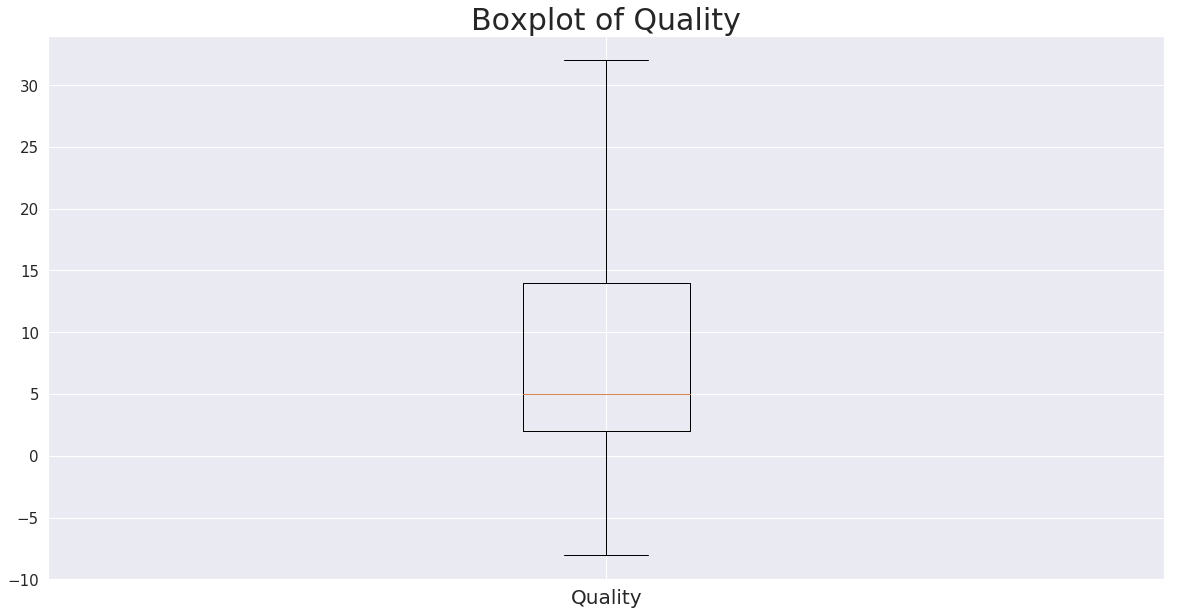

count    60501.000000
mean        33.660981
std        193.130730
min         -8.000000
25%          2.000000
50%          5.000000
75%         14.000000
max      10909.000000
Name: Quality, dtype: float64

In [8]:
# Boxplot of the new variable Quality

plt.figure(figsize=(20, 10))
plt.title("Boxplot of Quality", fontsize=30)

# Boxplot without showing the outliers 
plt.xticks(size=20)
plt.yticks(size=15)
plot= plt.boxplot(df_tags["Quality"], showfliers=False, labels=['Quality'])

plt.show()

# Detailed onformation about the variable Quality
df_tags["Quality"].describe()

In [0]:
# Creating same samples based on the "quality" score 

Q1 = 1
Q2 = 3
Q3 = 8

data_inf_Q1 = np.where(df_tags['Quality']<=Q1)[0]
data_Q1_Q2 = np.where((df_tags['Quality']>Q1) & (df_tags['Quality']<=Q2))[0]
data_Q2_Q3 = np.where((df_tags['Quality']>Q2) & (df_tags['Quality']<=Q3))[0]
data_sup_Q3 = np.where(df_tags['Quality']>Q3)[0]

from sklearn.utils import resample
inf_Q1_sample= resample(data_inf_Q1, n_samples=5, random_state=0)
Q1_Q2_sample = resample(data_Q1_Q2, n_samples=5, random_state=0)
Q2_Q3_sample = resample(data_Q2_Q3, n_samples=5, random_state=0)
sup_Q3_sample = resample(data_sup_Q3, n_samples=5, random_state=0)

In [10]:
data = {'Tags':df_tags['Tags'][Q2_Q3_sample], 'Body':df_tags['Body'][Q2_Q3_sample]}
dataframe = pd.DataFrame(data)
dataframe.head()

,Tags,Body
11969,<c++><gcc><mingw>,"<p>How can you get a recent release, i.e. 4.2+..."
44814,<.net><visual-studio><visual-studio-2008><debu...,<p>When debugging web sites that I'm working o...
40956,<python><design-patterns><architecture><open-s...,<p>Do you know of well designed open source ap...
14294,<oracle><plsql><database-cursor>,<p>I have plsql procedure which accepts certai...
54448,<.net><delphi><winapi><debugging>,<p>We host the .NET runtime as part of a Win32...


In [11]:
# An example of post without tags or markup

df_tags['Body'][sup_Q3_sample[4]]

'<p>When sending data over HTTPS, I know the content is encrypted, however I hear mixed answers about whether the headers are encrypted, or how much of the header is encrypted.</p>\n\n<p>How much of HTTPS headers <em>are</em> encrypted?</p>\n\n<p>Including GET/POST request URLs, Cookies, etc.</p>\n'

In [0]:
# Samples true tags

inf_Q1_sample_dict = {0:['<vbscript', '<file'],
                      1:['<ruby','<functional-programming'],
                      2:['<onpaint', '<c++'],
                      3:['<tix', '<python-3.x'],
                      4:['<ole-automation', '<excel', '<visual-studio']}

Q1_Q2_sample_dict = {0:['<javascript', '<spring-webflow'],
                     1:['<c#', '<class'],
                     2:['<c++', '<video'],
                     3:['<python',  '<file'],
                     4:['<sharepoint', '<web-service']
                     }

Q2_Q3_sample_dict = {0:['<mingw', '<c++', '<compiler'],
                     1:['<visual-studio', '<debugging', '<.net'],
                     2:['<python', '<architecture', '<open-source'],
                     3:['<plsql',  '<database'],
                     4:['<.net', '<delphi', 'debugging']
                     }

sup_Q3_sample_dict = {0:['<sql', '<sql-server'],
                      1:['<ruby-on-rails', '<ruby', '<rest'],
                      2:['<mysql', '<indexing'],
                      3:['<sql', '<python', '<django'],
                      4:['<https', '<post', '<get', '<encryption']
                     }


In [0]:
# Calcluating the F-measure for the different samples

samples = [inf_Q1_sample, Q1_Q2_sample, Q2_Q3_sample, sup_Q3_sample]
samples_tags_dicts = [inf_Q1_sample_dict, Q1_Q2_sample_dict, Q2_Q3_sample_dict, sup_Q3_sample_dict]
dict_loop = 0 
n_samples = 5
f_measures_samples = []

for idx, sample in enumerate(samples):
    sample_dict = samples_tags_dicts[idx]
    f_measures = []
       
    for index, list_tags in enumerate(df_tags['Tags'][sample].str.split('>')):
        score = 0
        recall = 0
        precision = 0 
        
        for tag in list_tags[:-1]:
           
            if tag in sample_dict[index]:
                score += 1
                
            recall = score/len(sample_dict[index])
            precision = score/len(list_tags[:-1])
            
            if precision + recall == 0:
                f_measure = 0
                
            else:
                f_measure = 2*precision*recall/(precision+recall)
                
            f_measures.append(f_measure)
    
    f_measures_samples.append(np.mean(f_measures))    

In [14]:
f_measures_samples

# We got the best F-measure with the sup_Q3_sample

[0.40112044817927167,
 0.5128205128205129,
 0.46754385964912276,
 0.6097105508870215]

# Exploratory analysis of the variable *'Tags'*



In [15]:
# Making a list of the different tags 

set_tags = set()
scoring = list()

for list_keywords, score in zip(df_tags['Tags'].str.split('>').values, df_tags['Quality']):
    
    if isinstance(list_keywords, float): 
        continue 
    
    scoring.append(score)
    set_tags = set_tags.union(list_keywords)
    
print('There are %d tags' % len(set_tags))

There are 10205 tags


In [0]:
def count_tag(data, ref_col, list_words, list_scores): 
    ''' Count the number of occurrences and the average score for each tag
    
    Parameters:
    
        data (dataframe): dataframe to use 
        ref_col (serie): column of dataframe containing tags
        list_words (list): list of different tags
        list_scores (list) : list of the different quality scores of the posts
    '''
    
    keyword_count = dict()
    index = -1
    
    for s in list_words: 
        keyword_count[s] = []
        keyword_count[s].append(0)
        keyword_count[s].append(0)
        
    for list_keywords in data[ref_col].str.split('>'): 
        
        if type(list_keywords) == float and pd.isnull(list_keywords): 
            continue
        
        index += 1
            
        for s in [s for s in list_keywords if s in list_words]: 
            if pd.notnull(s):
                keyword_count[s][0] += 1
                score = list_scores[index]
                keyword_count[s][1] += score
                    
    # conversion of our dictionary into a list
    keyword_occurences = []
    keyword_scores = []
    
    for tag, item in keyword_count.items():
        keyword_occurences.append([tag[1:], item[0], item[1]/item[0]])
        keyword_scores.append([tag[1:], item[1]/item[0]])
        
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    keyword_scores.sort(key = lambda x:x[1], reverse = True)
    
    return keyword_occurences, keyword_scores

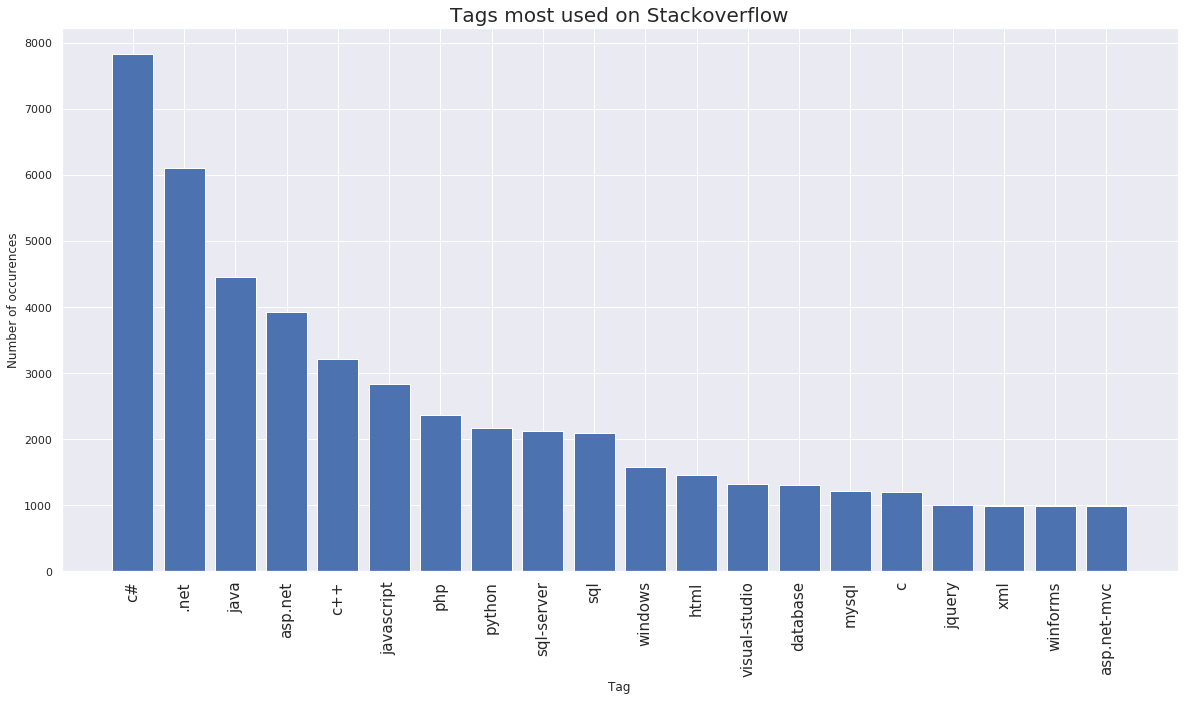

In [17]:
keyword_occurences, keyword_scores = count_tag(df_tags, 'Tags', set_tags, scoring)
keyword_occurences[1:5]
trunc_occurences = keyword_occurences[1:21]

# Graph showing the 20 tags most used on Stackoverflow

plt.figure(figsize=(20, 10))
y_axis = [i[1]  for i in trunc_occurences]
label_x = [i[0] for i in trunc_occurences]
plt.xticks(rotation=90, fontsize=15)
ax = plt.axes()
ax = ax.set(xlabel="Tag", ylabel="Number of occurences")

plt.bar(label_x, y_axis)
plt.title("Tags most used on Stackoverflow",fontsize=20)
plt.show()

In [18]:
score = dict()
num = -1
num_top_tags = 0

for i in np.linspace(101, 1001, 10, dtype='int'):
    num = num + 1
    score[num] = 0
    trunc_occurences = keyword_occurences[1:i]
    top_tags = [i[0] for i in trunc_occurences]

    for tags in df_tags['Tags']:
            
        for tag in tags.split('>')[:-1]:

            if tag[1:] in top_tags:
                score[num] += 1
                break
for i in np.arange(0,10):
    num_top_tags += 100
    percentage_posts = (score[i]/df_tags.shape[0])*100
    print('With %d tags kept, %.2f %% of the posts are concerned ' % (num_top_tags, percentage_posts))

With 100 tags kept, 85.69 % of the posts are concerned 
With 200 tags kept, 91.27 % of the posts are concerned 
With 300 tags kept, 93.63 % of the posts are concerned 
With 400 tags kept, 95.06 % of the posts are concerned 
With 500 tags kept, 96.13 % of the posts are concerned 
With 600 tags kept, 96.74 % of the posts are concerned 
With 700 tags kept, 97.24 % of the posts are concerned 
With 800 tags kept, 97.61 % of the posts are concerned 
With 900 tags kept, 97.86 % of the posts are concerned 
With 1000 tags kept, 98.08 % of the posts are concerned 


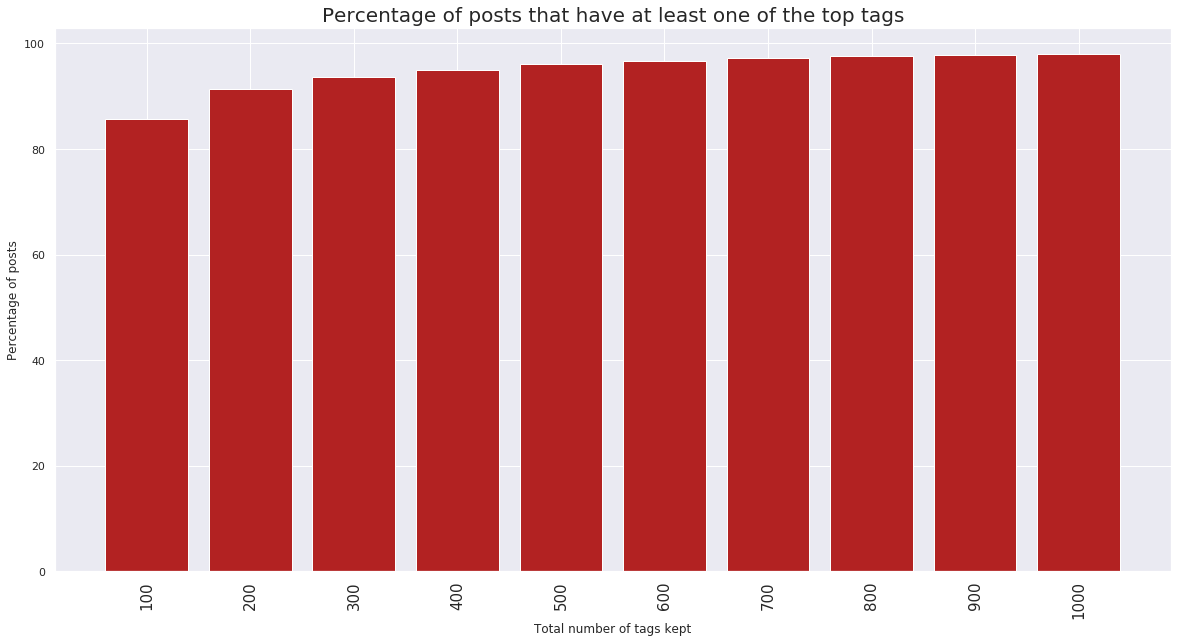

In [19]:
# Graph showing Percentage of posts that have one of the top_tags

plt.figure(figsize=(20, 10))
y_axis = [score[i]/df_tags.shape[0]*100 for i in np.arange(0,10)]
label_x = [str(i) for i in np.arange(100,1100, 100)]
plt.xticks(rotation=90, fontsize=15)
ax = plt.axes()
ax = ax.set(xlabel="Total number of tags kept", ylabel="Percentage of posts")
plt.title("Percentage of posts that have at least one of the top tags",fontsize=20)
plt.bar(label_x, y_axis, color='firebrick')
plt.show()

In [0]:
# I decided to keep the 400 most popular tags because they represent more than 95%
# of all the posts, and also because it'll be easier to predict the right tags
# from 400 words than from 10,000 and because we want to keep macro tags and 
# not be too specific since it's only a recommendation for a post

trunc_occurences = keyword_occurences[1:401]
top_tags = [i[0] for i in trunc_occurences]

def most_common(tags):
    ''' keep only the tags that are part of the 400 most used tags
    on StackOverflow

    tags: tags associated to post
    '''
    
    clean_tags = tags.split('>')[:-1]
    tags_filtered = []
    
    for tag in clean_tags:
        
        if tag[1:] in top_tags:
            tags_filtered.append(tag[1:])
            
    return tags_filtered


In [21]:
df_tags.shape

(60501, 23)

In [0]:
df_tags['Tags'] = df_tags['Tags'].apply(lambda x: most_common(x))
df_tags['Tags'] = df_tags['Tags'].apply(lambda x: x if len(x)>0 else None)

In [23]:
# We lost 3000 rows
df_tags.dropna(subset=['Tags'], inplace=True)
df_tags.shape

(57511, 23)

In [24]:
df_tags.head(10)

,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,DeletionDate,Score,ViewCount,Body,OwnerUserId,OwnerDisplayName,LastEditorUserId,LastEditorDisplayName,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate,Quality
0,4,1,7.0,NaN,2008-07-31 21:42:52,NaN,608,40090.0,<p>I want to use a track-bar to change a form'...,8.0,NaN,6786713.0,Rich B,2018-07-02 17:55:27,2019-01-17 13:39:48,Convert Decimal to Double?,"[c#, floating-point]",13.0,2,46.0,NaN,2012-10-31 16:42:47,610
1,6,1,31.0,NaN,2008-07-31 22:08:08,NaN,275,17611.0,<p>I have an absolutely positioned <code>div</...,9.0,NaN,63550.0,Rich B,2016-03-19 06:05:48,2018-12-15 03:57:18,Percentage width child element in absolutely p...,"[html, css, internet-explorer-7]",6.0,0,10.0,NaN,NaN,275
2,9,1,1404.0,NaN,2008-07-31 23:40:59,NaN,1743,530042.0,<p>Given a <code>DateTime</code> representing ...,1.0,NaN,3956566.0,Rich B,2018-04-21 17:48:14,2019-04-08 22:58:20,How do I calculate someone's age in C#?,"[c#, .net, datetime]",63.0,7,422.0,NaN,2011-08-16 19:40:43,1750
3,11,1,1248.0,NaN,2008-07-31 23:55:37,NaN,1419,144832.0,<p>Given a specific <code>DateTime</code> valu...,1.0,NaN,6479704.0,user2370523,2017-06-04 15:51:19,2019-01-03 08:03:07,Calculate relative time in C#,"[c#, datetime, time]",36.0,3,536.0,NaN,2009-09-04 13:15:59,1422
4,13,1,NaN,NaN,2008-08-01 00:42:38,NaN,570,168356.0,<p>Is there a standard way for a web server to...,9.0,NaN,9752662.0,Rich B,2018-12-24 22:47:42,2019-02-25 18:10:55,Determine a user's timezone,"[html, browser]",24.0,10,144.0,NaN,NaN,580
5,14,1,NaN,NaN,2008-08-01 00:59:11,NaN,389,117797.0,"<p>What is the difference between <a href=""htt...",11.0,Anonymous User,6495084.0,Rich B,2017-02-25 17:42:17,2018-09-19 03:49:19,Difference between Math.Floor() and Math.Trunc...,"[.net, math]",10.0,4,55.0,NaN,NaN,393
6,16,1,12446.0,NaN,2008-08-01 04:59:33,NaN,121,80977.0,<p>How do you expose a LINQ query as an ASMX w...,2.0,NaN,567854.0,Chris Fournier,2019-01-20 13:50:51,2019-01-20 13:50:51,Filling a DataSet or DataTable from a LINQ que...,"[c#, linq, web-services, .net-3.5]",6.0,0,14.0,NaN,NaN,121
7,17,1,26.0,NaN,2008-08-01 05:09:55,NaN,171,70175.0,"<p>How do I store binary data in <a href=""http...",2.0,NaN,546051.0,NaN,2011-10-21 21:29:17,2018-01-20 09:06:34,Binary Data in MySQL,"[mysql, database]",9.0,3,19.0,2018-11-29 15:36:04,NaN,174
8,19,1,531.0,NaN,2008-08-01 05:21:22,NaN,306,45919.0,<p>I'm looking for the fastest way to obtain t...,13.0,NaN,13.0,Chris Jester-Young,2018-05-15 16:45:05,2019-01-31 02:00:09,What is the fastest way to get the value of π?,"[performance, algorithm, language-agnostic, unix]",23.0,16,79.0,NaN,NaN,322
9,24,1,49.0,NaN,2008-08-01 12:12:19,NaN,156,68536.0,<p>If I have a <code>trigger</code> <code>befo...,22.0,NaN,5195227.0,Jim Anderson,2016-03-11 08:26:05,2016-11-19 21:05:59,Throw an error in a MySQL trigger,"[mysql, database, triggers]",6.0,0,23.0,NaN,NaN,156


# Text pre-procesing


*   Removing html format using Beautiful Soup library
*   Transforming abbreviations
*   Lowering text
*   Removing stop words
*   Lemmatizing words - grouping together the inflected forms of a word
*   Removing verbs and adjectives, since they don't give a valuable information about the post

In [0]:
def clean_text(text):
    ''' Lowering text and removing undesirable marks

    Parameter:
    text: document to be cleaned    
    '''
    
    text = text.lower()
    text = re.sub(r"\'\n", " ", text)
    text = re.sub(r"\'\xa0", " ", text)
    text = re.sub('\s+', ' ', text) # matches all whitespace characters
    text = text.strip(' ')
    
    return text

In [0]:
df_tags['Body'] = df_tags['Body'].apply(lambda x: clean_text(x))

In [0]:
# the text of the post, without tags or markup

df_tags['Body'] = df_tags['Body'].apply(lambda x: BeautifulSoup(x).get_text())

In [0]:
token = ToktokTokenizer()
punct = punctuation

In [0]:
def strip_list_noempty(mylist):

    newlist = (item.strip() if hasattr(item, 'strip') else item for item in mylist)
    
    return [item for item in newlist if item != '']

In [0]:
def clean_punct(text): 
    ''' Remove all the punctuation from text, unless it's part of an important
    tag (ex: c++, c#, etc)

    Parameter:

    text: text to remove punctuation from it
    '''
    
    words = token.tokenize(text)
    punctuation_filtered = []
    regex = re.compile('[%s]' % re.escape(punct))
    remove_punctuation = str.maketrans(' ', ' ', punct)
    
    for w in words:
        if w in top_tags:
            punctuation_filtered.append(w)
        else:
            w = re.sub('^[0-9]*', " ", w)
            punctuation_filtered.append(regex.sub('', w))
  
    filtered_list = strip_list_noempty(punctuation_filtered)
        
    return ' '.join(map(str, filtered_list))


In [0]:
df_tags['Body'] = df_tags['Body'].apply(lambda x: clean_punct(x)) 

In [0]:
lemma = wordnet.WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

In [0]:
def stopWordsRemove(text):
    ''' Removing all the english stop words from a corpus

    Parameter:

    text: document to remove stop words from it
    '''
    
    stop_words = set(stopwords.words("english"))
    words = token.tokenize(text)
    filtered = [w for w in words if not w in stop_words]
    
    return ' '.join(map(str, filtered))

In [0]:
df_tags['Body'] = df_tags['Body'].apply(lambda x: stopWordsRemove(x)) 

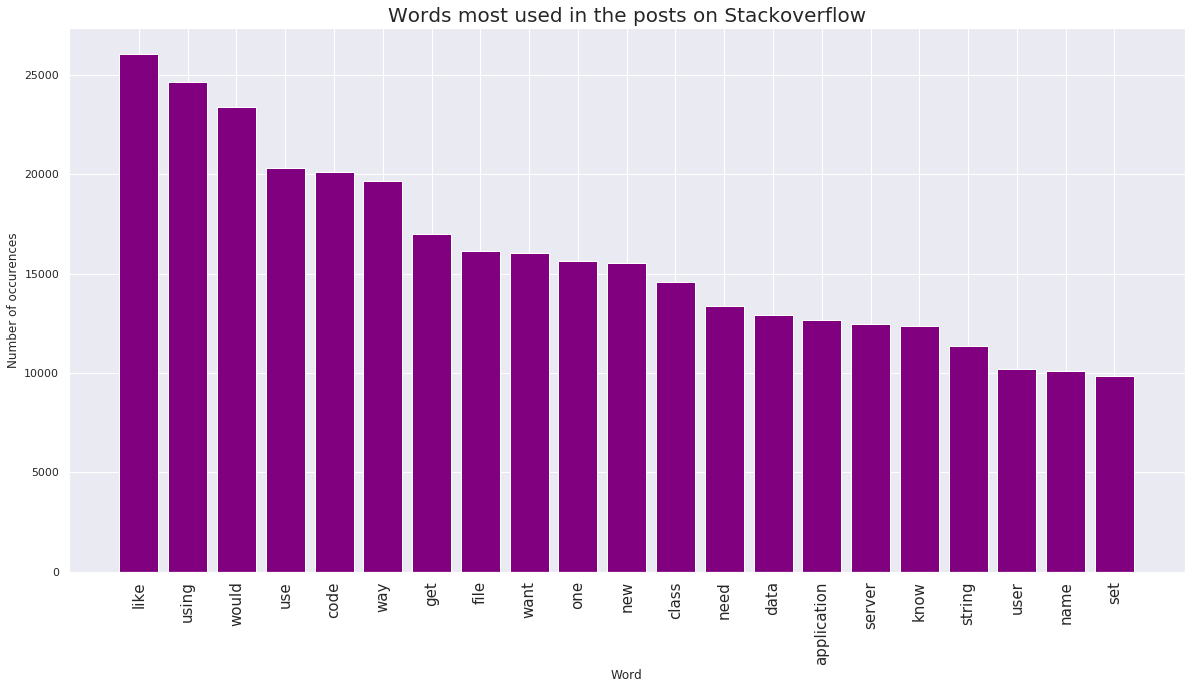

In [35]:
words = dict()

for sentence in df_tags['Body']:
    
    for word in token.tokenize(sentence):
        
        if word not in words.keys(): # we can use nltk.FraqDist instead
            words[word] = 1
           
        elif word in words.keys():
            words[word] += 1
            
occurences = []
    
for word, occurence in words.items():
    occurences.append([word, occurence])
            
occurences.sort(key = lambda x:x[1], reverse = True)
words_occurences = occurences[0:21]

# Graph showing the words most used in the post on Stackoverflow

plt.figure(figsize=(20, 10))
y_axis = [i[1]  for i in words_occurences]
x_axis = [k for k,i in enumerate(words_occurences)]
label_x = [i[0] for i in words_occurences]
plt.xticks(rotation=90, fontsize=15)
ax = plt.axes()
ax = ax.set(xlabel="Word", ylabel="Number of occurences")

plt.bar(label_x, y_axis, color='purple')
plt.title("Words most used in the posts on Stackoverflow",fontsize=20)
plt.show()

# There are a lot of verbs and adjectives (ex: like, use, get, new) and they don't give
# interesting informations about the contents of the question

In [0]:
nlp = spacy.load('en', disable=['parser', 'ner'])

def lemmatization(texts, allowed_postags, stop_words=stop_words):
    '''It keeps the lemma of the words (lemma is the uninflected form of a word),
    and deletes the underired POS tags
    
    Parameters:
    
    texts (list): text to lemmatize
    allowed_postags (list): list of allowed postags, like NOUN, ADL, VERB, ADV'''
             
    doc = nlp(texts) 
    texts_out = []
    
    for token in doc:
        
        if str(token) in top_tags:
            texts_out.append(str(token))
            
        elif token.pos_ in allowed_postags:
            
            if token.lemma_ not in ['-PRON-']:
                texts_out.append(token.lemma_)
                
            else:
                texts_out.append('')
     
    texts_out = ' '.join(texts_out)
            

    return texts_out

In [0]:
df_tags['Body'] = df_tags['Body'].apply(lambda x: lemmatization(x, ['NOUN', 'ADV']))

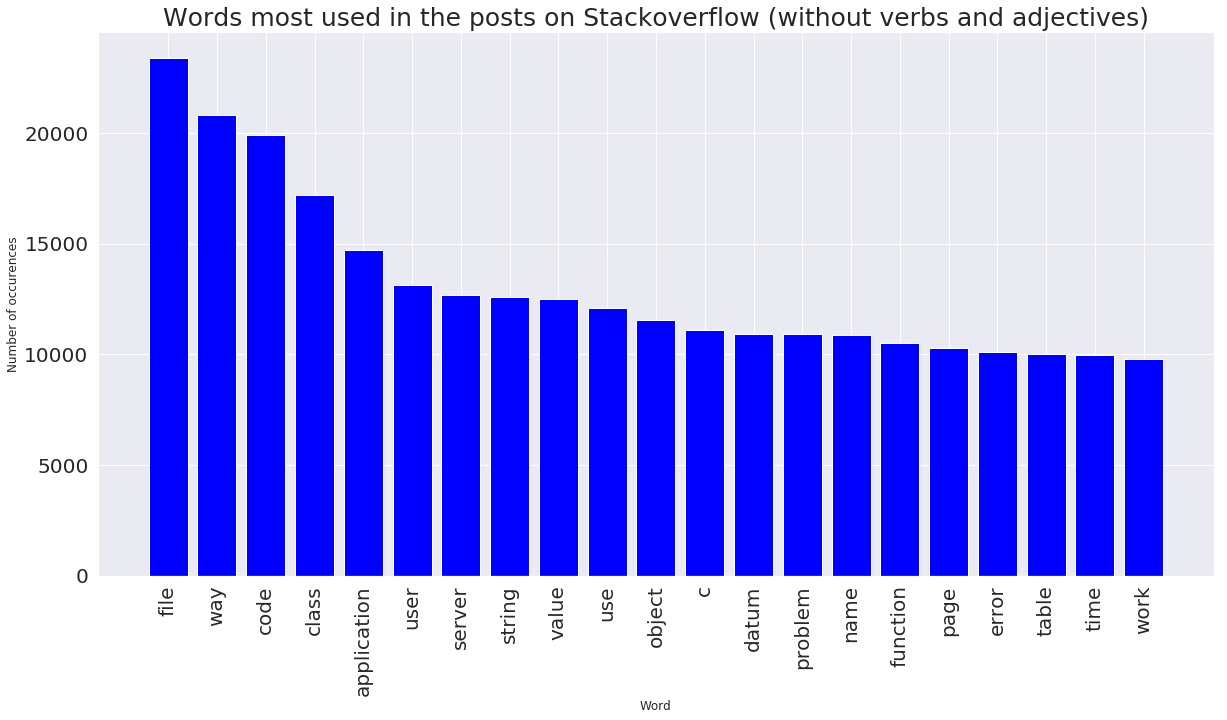

In [38]:
words = dict()

for sentence in df_tags['Body']:
    
    for word in token.tokenize(sentence):
        
        if word not in words.keys(): # we can use nltk.FreqDist instead
            words[word] = 1
           
        elif word in words.keys():
            words[word] += 1
            
occurences = []
    
for word, occurence in words.items():
    occurences.append([word, occurence])
            
occurences.sort(key = lambda x:x[1], reverse = True)
words_occurences = occurences[0:21]

# Graph showing the words most used in the post on Stackoverflow

plt.figure(figsize=(20, 10))
y_axis = [i[1]  for i in words_occurences]
x_axis = [k for k,i in enumerate(words_occurences)]
label_x = [i[0] for i in words_occurences]
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
ax = plt.axes()
ax = ax.set(xlabel="Word", ylabel="Number of occurences")

plt.bar(label_x, y_axis, color='blue')
plt.title("Words most used in the posts on Stackoverflow (without verbs and adjectives)",fontsize=25)
plt.show()

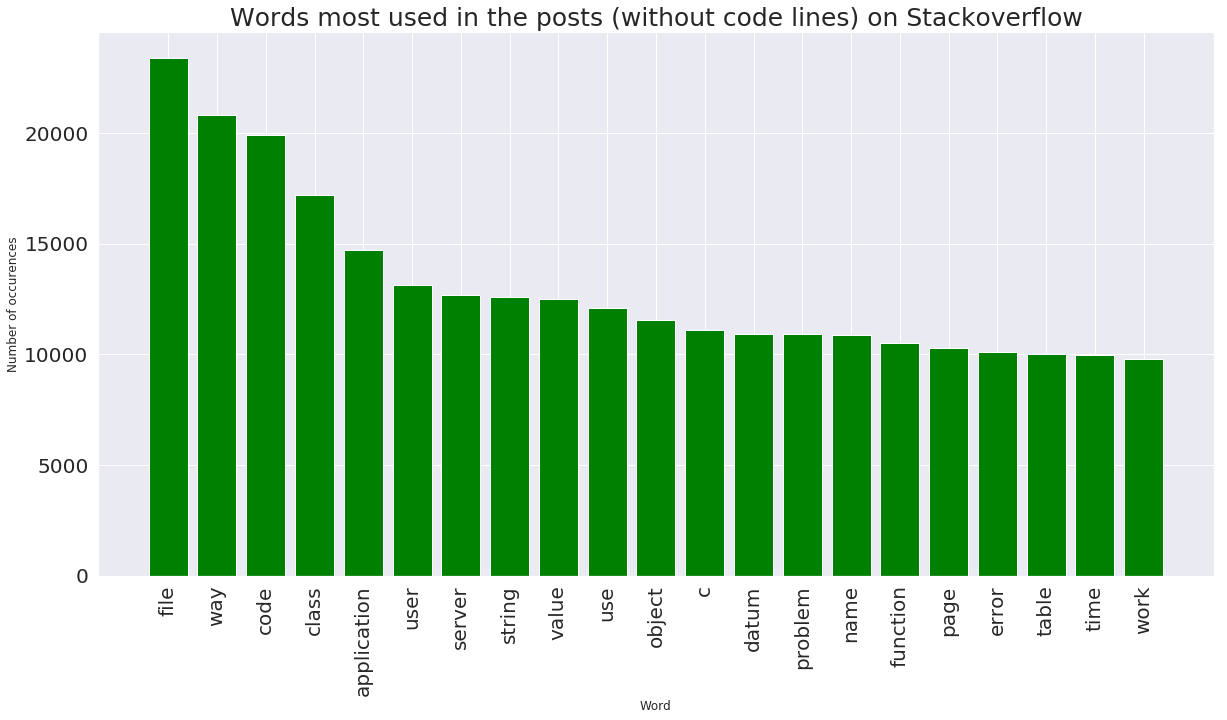

In [39]:
words = dict()

for sentence in df_tags['Body']:
    
    for word in token.tokenize(sentence):
        
        if word not in words.keys(): # we can use nltk.FreqDist instead
            words[word] = 1
           
        elif word in words.keys():
            words[word] += 1
            
occurences = []
    
for word, occurence in words.items():
    occurences.append([word, occurence])
            
occurences.sort(key = lambda x:x[1], reverse = True)
words_occurences = occurences[0:21]

# Graph showing the words most used in the post on Stackoverflow

plt.figure(figsize=(20, 10))
y_axis = [i[1]  for i in words_occurences]
x_axis = [k for k,i in enumerate(words_occurences)]
label_x = [i[0] for i in words_occurences]
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
ax = plt.axes()
ax = ax.set(xlabel="Word", ylabel="Number of occurences")

plt.bar(label_x, y_axis, color='green')
plt.title("Words most used in the posts (without code lines) on Stackoverflow", fontsize=25)
plt.show()

# There are a lot of verbs and adjectives (ex: like, use, get, new) and they don't give
# interesting informations about the contents of the question